Available columns in the Excel file:
['temp_bin', 'C321r1t_NT', 'C321r1t_err', 'C321r3t_NT', 'C321r3t_err', 'C322r1t_NT', 'C322r1t_err', 'C322r2t_NT', 'C322r2t_err', 'C323r3t_NT', 'C323r3t_err', 'C323r4t_NT', 'C323r4t_err', 'C324r1t_NT', 'C324r1t_err', 'C324r2t_NT', 'C324r2t_err', 'C325r1t_NT', 'C325r1t_err', 'C325r2t_NT', 'C325r2t_err', 'C326r1t_NT', 'C326r1t_err', 'C327r1t_NT', 'C327r1t_err', 'C327r2t_NT', 'C327r2t_err', 'C327r4t_NT', 'C327r4t_err', 'C328r1t_NT', 'C328r1t_err', 'C328r2t_NT', 'C328r2t_err', 'C329r2t_NT', 'C329r2t_err', 'C330r1t_NT', 'C330r1t_err', 'C330r2t_NT', 'C330r2t_err', 'C331r3t_NT', 'C331r3t_err', 'C331r4t_NT', 'C331r4t_err', 'C332r1t_NT', 'C332r1t_err', 'C332r2t_NT', 'C332r2t_err', 'C333r1t_NT', 'C333r1t_err', 'C333r2t_NT', 'C333r2t_err', 'C333r3t_NT', 'C333r3t_err']


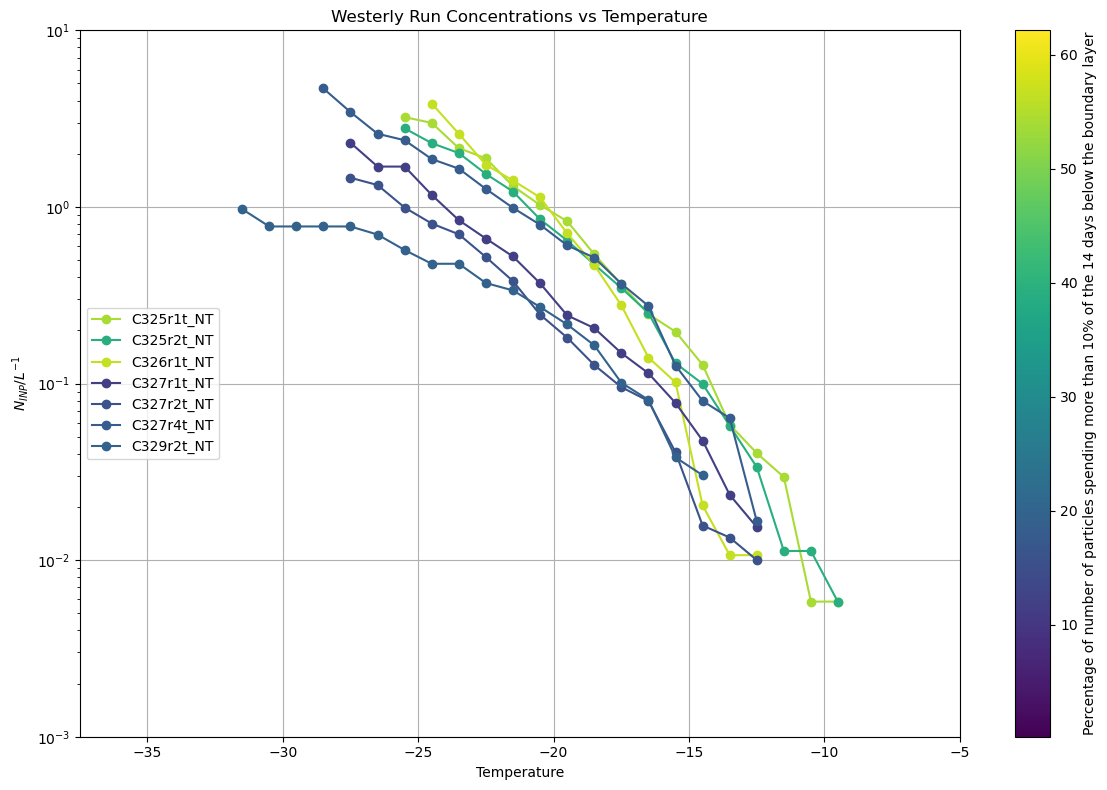

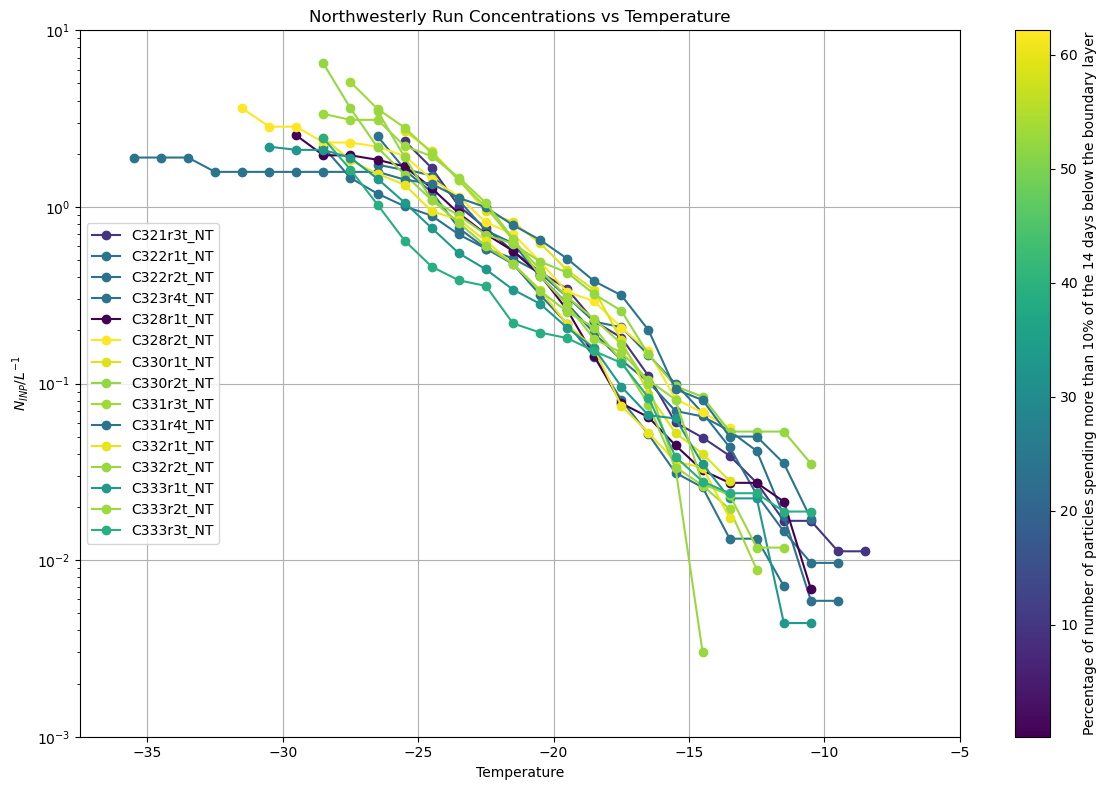

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

percent_below_W = {
    'C325r1': 100 - 45.84,
    'C325r2': 100 - 60.65,
    'C326r1': 100 - 43.26,
    'C327r1': 100 - 88.23,
    'C327r2': 100 - 84.32,
    'C327r4': 100 - 81.85,
    'C329r2': 100 - 80.47
}

percent_below_NW = {
    'C321r3': 100 - 90.30,
    'C322r1': 100 - 76.13,
    'C322r2': 100 - 76.70,
    'C323r4': 100 - 76.61,
    'C328r1': 100 - 99.82,
    'C328r2': 100 - 37.84,
    'C330r1': 100 - 41.21,
    'C330r2': 100 - 48.00,
    'C331r3': 100 - 46.62,
    'C331r4': 100 - 75.94,
    'C332r1': 100 - 39.82,
    'C332r2': 100 - 47.29,
    'C333r1': 100 - 66.50,
    'C333r2': 100 - 47.21,
    'C333r3': 100 - 61.03
}

# Read the Excel file
df = pd.read_excel('mphase_ER_CAOs.xlsx')

# Get the temperature data from the first column
temperature = df.iloc[:, 0]

# Consistent normalization for colorbar
all_percentages = list(percent_below_W.values()) + list(percent_below_NW.values())
global_min = min(all_percentages)
global_max = max(all_percentages)
norm = plt.Normalize(vmin=global_min, vmax=global_max)

# Function to create plot without error bars
def create_plot(data_dict, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    cmap = plt.cm.viridis
    
    # Initialize lists to determine axis limits
    all_y_data = []
    
    plotted_runs = []
    for run, percent in data_dict.items():
        # Filter columns that match the run and end with '_NT'
        matching_columns = [col for col in df.columns if run in col and col.endswith('_NT')]
        if matching_columns:
            for col in matching_columns:
                # Collect y data for limits calculation
                all_y_data.extend(df[col])
                
                color = cmap(norm(percent))
                # Plot the main data without error bars
                ax.plot(temperature, df[col], 'o-', c=color, label=col)
                plotted_runs.append(col)
        else:
            print(f"No matching column found for run {run} ending with '_NT'")
    
    if not plotted_runs:
        print(f"No data plotted for {title}. Check if run names match column names.")
        return
    
    # Automatically set axis limits
    ax.set_xlabel('Temperature')
    ax.set_ylabel(r'$N_{INP}/L^{-1}$')
    ax.set_yscale('log')
    
    # Set x-axis limits
    ax.set_xlim(-37.5, -5)
    
    # Set y-axis limits
    y_min = np.min(all_y_data)
    y_max = np.max(all_y_data)
    ax.set_ylim(max(1e-3, y_min), max(1e1, y_max))
    
    ax.set_title(f'{title} Run Concentrations vs Temperature')
    ax.grid(True)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Percentage of number of particles spending more than 10% of the 14 days below the boundary layer')
    
    # Create legend outside the plot
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left')
    
    plt.tight_layout()
    plt.show()
    # plt.savefig(fname='Run_concentrations_vs_temp_with_time.png', format='png', dpi=300, bbox_inches='tight')
    # plt.close()

# Print column names
print("Available columns in the Excel file:")
print(df.columns.tolist())

# Create plots
create_plot(percent_below_W, 'Westerly')
create_plot(percent_below_NW, 'Northwesterly')
